In [1]:
# Importing Toolkits

import pandas as pd
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# from influxdb import InfluxDBClient
from pandas.plotting import autocorrelation_plot
# from scipy.stats import linregress
# from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.graphics.tsaplots import plot_acf
# import hyperspy.api as hs


In [2]:
# Import and Filter the Data
# Load data
# path = '../02-15-22 Data for Students/02-15-22 Data for Students'
df = pd.read_csv('data.csv')

# Filter out the rows with NaN NO concentration
df= df[df['NO (350,3000) 191C span (MG 2030)'] != 0]
df

,Date Time,"NO (350,3000) 191C span (MG 2030)",NO2 (150) 191C (1of2) span (MG 2030),NO2 (2000) 191C (2of2) span (MG 2030),"N2O (100,200,300) 191C (1of2) span (MG 2030)",NH3 (300) 191C (1of2) span (MG 2030),NH3 (3000) 191C (2of2) span (MG 2030),HNCO (400) 191C (MG 2030),H2O% (25) 191C span (MG 2030),"Formaldehyde (70,500) 191C (MG 2030)",...,phase Angle (MG 2030),laser PP (MG 2030),laser DC (MG 2030),Bad Scan counter (MG 2030),Centerburst Location (MG 2030),Linearizer Check (MG 2030),SNR 2500 (MG 2030),sBeam @ 2500 (MG 2030),Cell Temperature (MG 2030),Cell Pressure (MG 2030)
0,08:32.4,0.275,0.230,0.807,0.053,0.068,-0.710,-1.028,-0.013,0.388,...,89.947,7.833,-5.029,0,565.457,0.001,564.301,1.353,190.132,1.033
1,08:33.4,0.043,0.117,-0.269,-0.099,0.163,0.403,4.173,-0.001,0.453,...,89.947,7.833,-5.026,0,565.456,0.002,672.890,1.353,190.132,1.028
2,08:34.4,-0.219,-0.008,-0.161,0.073,0.149,1.302,-1.529,-0.016,-0.027,...,89.947,7.833,-5.024,0,565.456,0.002,660.867,1.353,190.132,1.028
3,08:35.4,0.602,0.181,0.037,-0.044,0.093,1.006,-0.764,0.008,0.546,...,89.947,7.833,-5.024,0,565.456,0.002,499.613,1.353,190.132,1.028
4,08:36.4,0.183,0.129,-0.945,-0.038,0.195,-0.373,-1.896,-0.015,-0.264,...,89.747,7.833,-5.024,0,565.455,0.001,479.172,1.351,190.132,1.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248253,06:05.4,-0.123,0.135,-1.879,0.073,-0.113,0.331,-0.397,-0.024,-0.168,...,89.787,7.587,-4.879,0,565.749,0.003,474.724,1.359,189.827,1.010
248254,06:06.4,-0.260,-0.019,-0.215,-0.160,-0.041,-0.733,0.775,-0.016,-0.223,...,89.787,7.587,-4.879,0,565.749,0.003,503.136,1.358,189.827,1.010
248255,06:07.4,-0.158,0.152,0.275,0.006,0.172,-0.090,-2.430,-0.017,-0.197,...,89.807,7.639,-4.879,0,565.750,0.003,588.386,1.357,189.827,1.010
248256,06:08.4,-0.056,0.137,-0.586,0.133,0.026,0.291,-0.689,-0.013,-0.037,...,89.827,7.691,-4.879,0,565.749,0.003,563.920,1.358,189.928,1.016


In [3]:
for col in df.columns:
    print(col)

Date Time
NO (350,3000) 191C span (MG 2030)
NO2 (150) 191C (1of2) span (MG 2030)
NO2 (2000) 191C (2of2) span (MG 2030)
N2O (100,200,300) 191C (1of2) span (MG 2030)
NH3 (300) 191C (1of2) span (MG 2030)
NH3 (3000) 191C (2of2) span (MG 2030)
HNCO (400) 191C (MG 2030)
H2O% (25) 191C span (MG 2030)
Formaldehyde (70,500) 191C (MG 2030)
CO2 low% (4) 191C (2of2) span (MG 2030)
CO2% (20) 191C (1of2) R4 span (MG 2030)
CO (500) 191C (1of3) span (MG 2030)
CO% (1) 191C (2of3) span (MG 2030)
Propylene (200,1000) 191C (1of2) (MG 2030)
Diesel C1 (4500) 191C (MG 2030)
Ethylene (100,3000) 191C (MG 2030)
CH4 (250) 191C (1of2) (MG 2030)
CH4 (3000) 191C (2of2) (MG 2030)
Ethane (1000) 191C (MG 2030)
Acetylene (1000) 191C (MG 2030)
HNO2 (20) 191C (MG 2030)
N2O (1040) 191C (2of2) (MG 2030)
CO% (10) 191C (3of3) (MG 2030)
MeOH (1000) 191C (MG 2030)
Formic Acid (100) 191C (MG 2030)
SO2 (300) 191C (MG 2030)
Propylene (10000) 191C (2of2) (MG 2030)
H2SO4 (50) in high propylene 150C (MG 2030)
NO2 autorange (MG 2030)

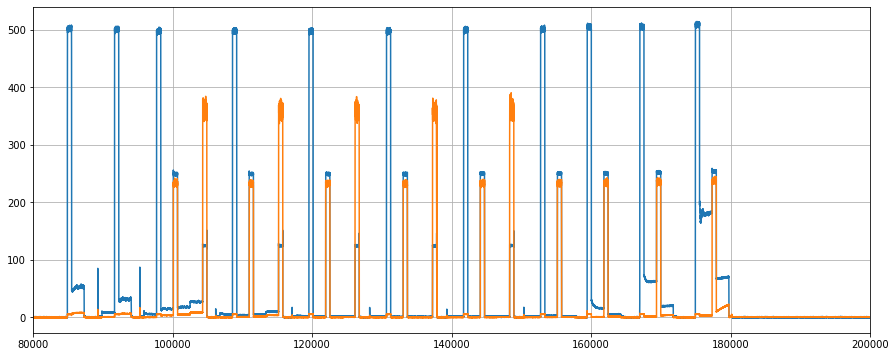

In [5]:
NO_data = df['NO (350,3000) 191C span (MG 2030)']
NO2_data = df['NO2 (150) 191C (1of2) span (MG 2030)']
Temp_data = df['Cell Temperature (MG 2030)']

# fig, axes = plt.subplots(figsize=(15,6), nrows=2, ncols=1)
plt.figure(figsize=(15, 6))
NO_data.plot(x='Time', y='NO', label='NO Level')
NO2_data.plot(x='Time', y='NO', label='NO2 Level')
# Temp_data.plot(x='Time', y='Temperature', ax=axes[1], label='Temperature')
plt.xlim([80000, 200000])

plt.grid(True)


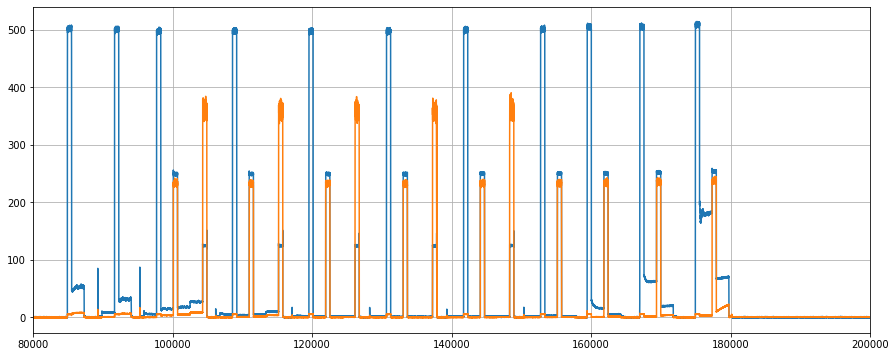

In [10]:
NO_data = df['NO (350,3000) 191C span (MG 2030)']
NO2_data = df['NO2 (150) 191C (1of2) span (MG 2030)']


# fig, axes = plt.subplots(figsize=(15,6), nrows=2, ncols=1)
plt.figure(figsize=(15, 6))
NO_data.plot(x='Time', y='NO', label='NO Level')
NO2_data.plot(x='Time', y='NO', label='NO2 Level')
# Temp_data.plot(x='Time', y='Temperature', ax=axes[1], label='Temperature')
plt.xlim([80000, 200000])

plt.grid(True)


In [7]:
from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import FixedLocator, FuncFormatter

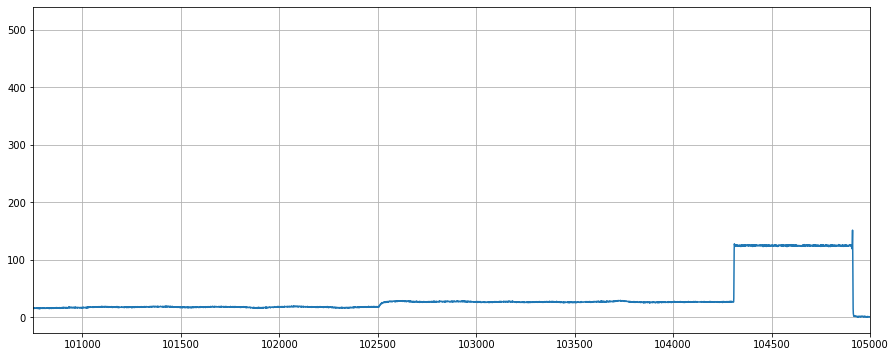

In [26]:
plt.figure(figsize=(15, 6))
NO_data.plot(x='Time', y='NO', label='NO Level')
plt.xlim([100750, 105000])
#plt.ylim([0, 90])
plt.grid(True)



In [ ]:
test_1 =  

Text(0, 0.5, 'SO2 Level (ppm)')

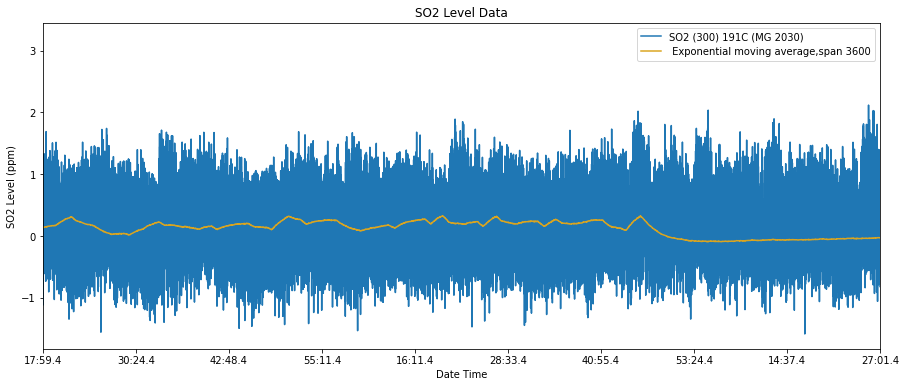

In [14]:
plt.figure(figsize=(15, 6))
NO_data = df['NO (350,3000) 191C span (MG 2030)']
SO2_data = df['SO2 (300) 191C (MG 2030)']
SO2_data.plot()

plt.xlim([90000, 180000])

# Data Smoothing
input_data = df[["Date Time", "SO2 (300) 191C (MG 2030)"]]

subset = input_data[input_data["Date Time"] >= "08:34.4"]
subset.set_index('Date Time', inplace=True)


# Plot the Smoothed Data
subset['SO2 (300) 191C (MG 2030)'].ewm(span = 3600).mean().plot(color='goldenrod',label = ' Exponential moving average,span 3600')
# subset['NO (350,3000) 191C span (MG 2030)'].ewm(span = 14400).mean().plot(color='goldenrod',label = ' Exponential moving average,span 14400')
# subset['NO (350,3000) 191C span (MG 2030)'].ewm(span = 28800).mean().plot(color='purple',label = ' Exponential moving average, span 28800')

plt.legend()
plt.title("SO2 Level Data")
plt.xlabel('Date Time')
plt.ylabel('SO2 Level (ppm)')

In [ ]:
area = range(10400,)

In [ ]:
cycle=range(1,11)
NO_in =np.array([514.153, 513.943,513.682,513.682,513.665,513.63,513.273,513.264,513.239,513.166])
NO_out = np.array([85,    88,     149.197,145.409,146.409,146.1, 146,    0,       0,      0])
NO_conv = NO_out/NO_in
plt.figure(figsize=(15, 6))
plt.plot(cycle,NO_conv)
plt.show()
    

In [ ]:
df2 = pd.read_csv('PACCAR_Sorted_Data.csv')
df2